In [503]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import LASSI as lassi
import seaborn as sns
%pylab inline
pylab.rcParams['figure.figsize']=(10,8)
sns.set()
sns.set_style("white")
sns.set_style("ticks")
sns.set_context('paper')
pylab.rcParams['font.family']='STIXGeneral'
pylab.rcParams['mathtext.fontset'] = 'stix'
pylab.rcParams['xtick.labelsize'] = 24
pylab.rcParams['ytick.labelsize'] = 24
erKw = {'elinewidth':2.5, 'linewidth':2., 'capsize':2.0, 'capthick':2., 'markersize':6}
comp_lab = [r'$\tilde{g}(r)$',
           r'$\tilde{g}_{00}(r)$', r'$\tilde{g}_{11}(r)$', r'$\tilde{g}_{22}(r)$',
           r'$\tilde{g}_{33}(r)$', r'$\tilde{g}_{44}(r)$', r'$\tilde{g}_{55}(r)$',
           r'$\tilde{g}_{01}(r)$', r'$\tilde{g}_{02}(r)$', r'$\tilde{g}_{03}(r)$',
           r'$\tilde{g}_{04}(r)$', r'$\tilde{g}_{05}(r)$', r'$\tilde{g}_{12}(r)$', 
           r'$\tilde{g}_{13}(r)$', r'$\tilde{g}_{14}(r)$', r'$\tilde{g}_{15}(r)$',
           r'$\tilde{g}_{23}(r)$', r'$\tilde{g}_{24}(r)$', r'$\tilde{g}_{25}(r)$',
           r'$\tilde{g}_{34}(r)$', r'$\tilde{g}_{35}(r)$', r'$\tilde{g}_{45}(r)$']
sns.set_palette(sns.color_palette("hls",5))           

Populating the interactive namespace from numpy and matplotlib


In [511]:
reload(lassi) 
mySetup = lassi.Sim_Setup(['LinSys'], ['1.0'], 'paramFast.key')
mySetup.Set_SimulationPath('/home/fdar/Work/LASSI/PythonCodes/BetaPrep/')
mySetup.Set_PathToLASSI('/work/fdar/GIT_LASSI/GIT_Repos/LASSI_GIT/lassi')
mySetup.Set_QSUB_Command('cs_edam')
mySetup.Set_QSUB_Queues('LION','ZEBRA')
mySetup.AddEnergyFiles_ForAll('energyNO.prm', 'energyInt.prm')
mySetup.ResetStruc('LinSys')
mySetup.AddStruc_ImpLinear('LinSys', 500, 5, 0, 3)
mySetup.AddStruc_ImpLinear('LinSys', 500, 5, 1, 3)
mySetup.Write_StructureFileFor('LinSys','Li_st.prm')
mySetup.SetTemperatures_ForAll(1.0, 3.0, 25, 1000.0)
mySetup.SetMCSteps_ForAll(5e6, 2e8)
boxSizeKW = {'low_con':-4.0, 'high_con':-0.5, 'tot_boxes' : 25}
mySetup.SetBoxSizesFor('LinSys', **boxSizeKW)
mySetup.SetBoxSizes_To('LinSys')


print(mySetup.SysInfo['LinSys']['Boxes'])
print mySetup.SysInfo['LinSys']['Structure']

#mySetup.MakeDirs_For('LinSys')
#mySetup.Write_ParamsWIntFor('LinSys')
#mySetup.Write_ParamsNoIntFor('LinSys')
#mySetup.Reset_QSUB_Iter()
#mySetup.SubmitWIntJobs_ToQueueFor('LinSys', 'LION')
#mySetup.SubmitNoIntJobs_ToQueueFor('LinSys', 'ZEBRA')


myAnalysis = lassi.Analysis(mySetup)

Initialized a LASSI setup with the following structures:
  LinSys:= Linker length 1.0 lattice units.
Simulations shall be done in dir: /home/fdar/Work/LASSI/PythonCodes/BetaPrep/
LinSys has energy files: Int:/home/fdar/Work/LASSI/PythonCodes/BetaPrep/energyInt.prm  NoInt:/home/fdar/Work/LASSI/PythonCodes/BetaPrep/energyNO.prm
Wrote structures to file: Li_st.prm
LinSys has structure file: Li_st.prm
[ 25  28  31  35  39  43  49  54  61  68  76  85  96 107 120 134 150 168
 188 210 235 263 294 329 368]
[[500, array([[0, 0, 3, 1],
       [1, 0, 3, 0],
       [1, 0, 3, 2],
       [2, 0, 3, 1],
       [2, 0, 3, 3],
       [3, 0, 3, 2],
       [3, 0, 3, 4],
       [4, 0, 3, 3]])], [500, array([[0, 1, 3, 1],
       [1, 1, 3, 0],
       [1, 1, 3, 2],
       [2, 1, 3, 1],
       [2, 1, 3, 3],
       [3, 1, 3, 2],
       [3, 1, 3, 4],
       [4, 1, 3, 3]])]]


In [278]:
#mySetup.MakeDirs_For('LinSys')
#mySetup.Write_ParamsWIntFor('LinSys')
#mySetup.Write_ParamsNoIntFor('LinSys')
#mySetup.Reset_QSUB_Iter()
#mySetup.SubmitWIntJobs_ToQueueFor('LinSys', 'LION')
#mySetup.SubmitNoIntJobs_ToQueueFor('LinSys', 'ZEBRA')

In [345]:
#print myAnalysis.Collect_WInt_RDFsFor('LinSys')
#myAnalysis.Save_WIntPDFFor('LinSys')
#myAnalysis.Save_NoIntPDFFor('LinSys')

In [440]:
myAnalysis.Save_WIntClus_For('LinSys')

In [357]:
myAnalysis.SysInfo['LinSys']['Raw_NoInt_PDF'] = 'LinSys_N_PDF.b'
myAnalysis.SysInfo['LinSys']['Raw_WInt_PDF'] = 'LinSys_W_PDF.b'

In [347]:
myAnalysis.Gen_pRDFs_For('LinSys')

In [505]:
myAnalysis.Gen_RhoBar_For('LinSys')

In [506]:
myAnalysis.Gen_PhiC_For('LinSys')

In [510]:
print myAnalysis.SysInfo['LinSys']['RDF File']

LinSys_rhobar.c.npy


In [512]:
myAnalysis.SysInfo['LinSys']['Perc File'] = 'LinSys_phic.c.npy' 
myAnalysis.SysInfo['LinSys']['RhoBar File'] = 'LinSys_rhobar.c.npy'
myAnalysis.Store_OrderParamInterp_For('LinSys')

In [113]:
import pickle

In [316]:
print myAnalysis.SysInfo['LinSys']['Boxes']

[ 25  28  31  35  39  43  49  54  61  68  76  85  96 107 120 134 150 168
 188 210 235 263 294 329 368]


In [445]:
rho_bar = np.load("LinSys_rhobar.c.npy")
phi_c = np.load("LinSys_phic.c.npy")

In [447]:
print phi_c.shape

(25, 25, 2)


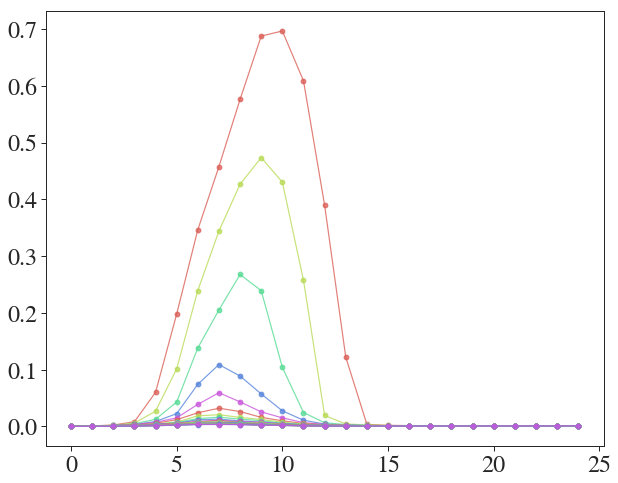

In [363]:
[plt.plot(rho_bar[:,0,i], 'o-', alpha=0.8) for i in range(25)]
plt.show()

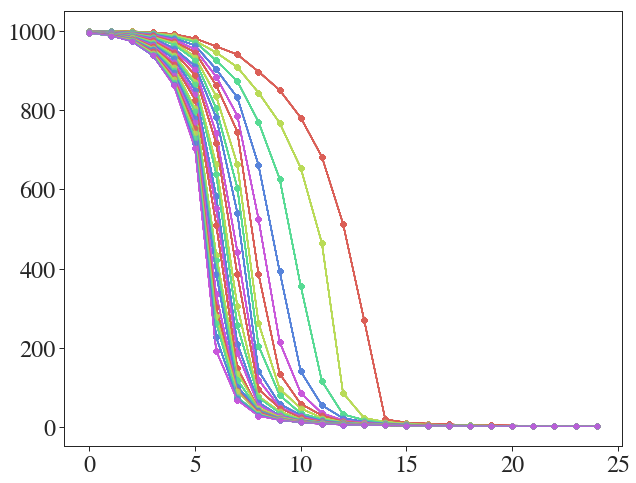

In [448]:
[plt.plot(phi_c[:,:,0], 'o-', alpha=0.8) for i in range(25)]
plt.show()

In [484]:
dumdum2 = [[a_box for a_box in myAnalysis.SysInfo['LinSys']['Boxes']]] * 25
dumdum2 = np.log10(1000./np.array(dumdum2)**3.)
#print dumdum2

[[-1.19382003 -1.34147409 -1.47408508 -1.63220413 -1.77319382 -1.90040537
  -2.07058824 -2.19718128 -2.35598951 -2.49752674 -2.64244078 -2.78825678
  -2.9468137  -3.08815133 -3.23754374 -3.3813144  -3.52827378 -3.67592785
  -3.82247355 -3.96665788 -4.11320359 -4.25986725 -4.40504199 -4.55158769
  -4.69754346]
 [-1.19382003 -1.34147409 -1.47408508 -1.63220413 -1.77319382 -1.90040537
  -2.07058824 -2.19718128 -2.35598951 -2.49752674 -2.64244078 -2.78825678
  -2.9468137  -3.08815133 -3.23754374 -3.3813144  -3.52827378 -3.67592785
  -3.82247355 -3.96665788 -4.11320359 -4.25986725 -4.40504199 -4.55158769
  -4.69754346]
 [-1.19382003 -1.34147409 -1.47408508 -1.63220413 -1.77319382 -1.90040537
  -2.07058824 -2.19718128 -2.35598951 -2.49752674 -2.64244078 -2.78825678
  -2.9468137  -3.08815133 -3.23754374 -3.3813144  -3.52827378 -3.67592785
  -3.82247355 -3.96665788 -4.11320359 -4.25986725 -4.40504199 -4.55158769
  -4.69754346]
 [-1.19382003 -1.34147409 -1.47408508 -1.63220413 -1.77319382 -1.90

In [485]:
rdf_comp = 0;
TotAr = []
for temp_idx, mc_temp in enumerate(np.linspace(1.0,3.0,25)):
    mc_temp  = float(mc_temp)/2.
    for box_idx, box_size in enumerate(myAnalysis.SysInfo['LinSys']['Boxes']):
        conc_now    = np.log10(1000./box_size**3.);
        rho_bar_val = rho_bar[box_idx][rdf_comp][temp_idx]
        phi_c_val   = phi_c[box_idx][temp_idx][0]/1000.
        TotAr.append([conc_now, mc_temp, rho_bar_val, phi_c_val])
dumdum   = np.array(TotAr).T

In [491]:
dumdum2 = [[a_box for a_box in myAnalysis.SysInfo['LinSys']['Boxes']]] * 25
dumdum2 = np.log10(1000./np.array(dumdum2)**3.)
dumdum2 = [[a_box for a_box in np.linspace(1.0,3.0,25)]] * 25
dumdum2 = np.array(dumdum2)/2.

In [494]:
print dumdum2.T.flatten()-dumdum[1]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [474]:
dumdum2 = rho_bar[:,0,:].T
dumdum2 = dumdum2.flatten()
print dumdum[2][1]
print dumdum2[1]

0.0009409262947083396
0.0009409262947083396


In [498]:
dumdum2 = phi_c[:,:,0].T
dumdum2 = dumdum2.flatten()/1000.
print dumdum[3]-dumdum2

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

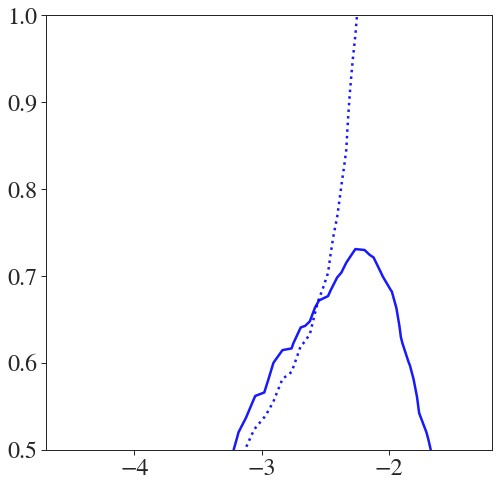

In [475]:
myFig = plt.figure(figsize=[8,8])
myAx  = myFig.subplots(1,1, sharey=True)
num_points = 50; rho_cut = 0.025; rho_cut = rho_cut - 0.*rho_cut; phi_cut = 0.17
meth = 'linear'

xDat, yDat, OrDat, PhiDat = dumdum;
OrDat = dumdum20
xgrid1 = np.linspace(xDat.min(), xDat.max(), num_points); ygrid1 = np.linspace(yDat.min(), yDat.max(), num_points)
xgrid, ygrid = np.meshgrid(xgrid1, ygrid1)
OrFunc = sp.interpolate.Rbf(xDat, yDat, OrDat, function=meth); OrGrid = OrFunc(xgrid, ygrid)
PhiFunc = sp.interpolate.Rbf(xDat, yDat, PhiDat, function=meth); PhiGrid = PhiFunc(xgrid, ygrid)
CS4  = myAx.contour(xgrid, ygrid, OrGrid, rho_cut, colors='blue', linewidths=2.5, alpha=0.9)
CS4.collections[0].set_label(r'W/O Ligand')
CS4  = myAx.contour(xgrid, ygrid, PhiGrid, phi_cut, colors='blue', linewidths=2.5, alpha=0.9, linestyles='dotted')
plt.ylim(0.5,1.0)
plt.show()

In [415]:
dumdum = np.loadtxt('LinSys/1.0/107/WInt/1/LinSys_GR.dat')

In [418]:
print dumdum[:,0]/dumdum[:,-1]

[0.92548617 0.99227383 0.99905327 1.00277028 0.99843963 0.99810056
 1.00142318 0.99796131 0.9970415  0.99882411 1.00023028 0.9998428
 0.99945327 1.00002598 0.99979178 0.99935589 1.00039308 0.99731794
 0.99892561 0.99851682 0.99864449 0.99841514 0.99715271 0.99971308
 1.0000286 ]


In [428]:
dumdum_tot = []
#for i in range(2):
for a_box in myAnalysis.SysInfo['LinSys']['Boxes']:
    dumdum = []
    #for a_box in myAnalysis.SysInfo['LinSys']['Boxes']:
    for i in range(2):
        fName = 'LinSys/1.0/'
        fName += str(a_box)
        fName +='/WInt/'
        fName += str(i+1)
        fName += '/LinSys_CLUS.dat'
        dumdum.append(np.loadtxt(fName))
    dumdum_tot.append(dumdum)
dumdum = np.array(dumdum_tot)

In [431]:
print dumdum.shape
dumdum2 = dumdum.mean(axis=1)
print dumdum2.shape

(25, 2, 25, 1001)
(25, 25, 1001)


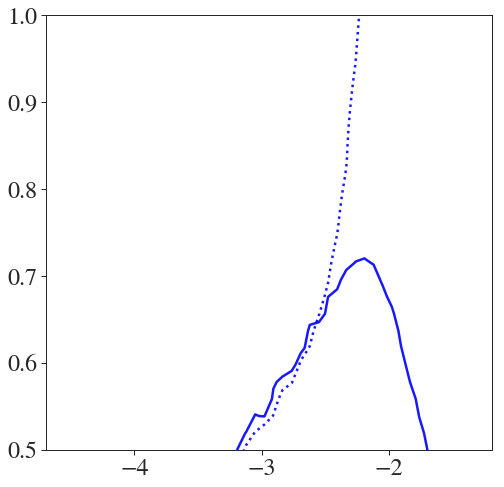

In [514]:
myFig = plt.figure(figsize=[8,8])
myAx  = myFig.subplots(1,1, sharey=True)
rho_cut = 0.025; rho_cut = rho_cut - 0.*rho_cut; phi_cut = 0.17
xgrid, ygrid, OrGrid, PhiGrid = myAnalysis.SysInfo['LinSys']['Order Params']
CS4  = myAx.contour(xgrid, ygrid, OrGrid, rho_cut, colors='blue', linewidths=2.5, alpha=0.9)
CS4.collections[0].set_label(r'W/O Ligand')
CS4  = myAx.contour(xgrid, ygrid, PhiGrid, phi_cut, colors='blue', linewidths=2.5, alpha=0.9, linestyles='dotted')
plt.ylim(0.5,1.0)
plt.show()